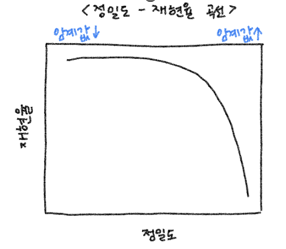

In [5]:
from sklearn.metrics import precision_recall_curve, auc
import numpy as np

In [6]:
# 주어진 재현율과 정밀도 값을 기반으로 AP를 계산.
#    - recalls (np.array): 재현율 값 배열
#    - precisions (np.array): 정밀도 값 배열
#    Returns: float: 계산된 AP 값

def calculate_ap(recalls, precisions):
    # 정밀도와 재현율의 곡선 아래 면적을 계산 (AUC)
    return auc(np.array(recalls), np.array(precisions))

# 각 클래스에 대한 AP를 계산, 평균(mAP) 계산
#   - y_true (np.array): 실제 레이블 배열 (one-hot 인코딩 형식)
#   - y_scores (np.array): 예측 점수 배열 (모델 출력 점수)
#   - num_classes (int): 클래스의 총 개수

#    Returns:
#    - float: 계산된 mAP 값

def mean_average_precision(y_true, y_scores, num_classes):

    ap_list = []
    for class_id in range(num_classes):
        # 각 클래스별로 실제 값과 예측 점수를 추출
        class_true = y_true[:, class_id]
        class_scores = y_scores[:, class_id]

        # 정밀도와 재현율 계산
        precision, recall, _ = precision_recall_curve(class_true, class_scores)
        precision = np.flip(precision)
        recall = np.flip(recall)

        # AP 계산
        ap = calculate_ap(recall, precision)
        ap_list.append(ap)

    # 모든 클래스의 AP를 평균내어 mAP 계산
    return np.mean(ap_list)



In [7]:
# 예제 데이터
y_true = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])  # 실제 레이블 (one-hot)
y_scores = np.array([[0.9, 0.1, 0.8], [0.1, 0.9, 0.1], [0.8, 0.2, 0.7]])  # 예측 점수
num_classes = 3  # 클래스 수



In [8]:
# mAP 계산
map_score = mean_average_precision(y_true, y_scores, num_classes)
print(f"Mean Average Precision (mAP): {map_score}")

Mean Average Precision (mAP): 1.0
